
Plot dell'iperboloide come superficie rigata

In [3]:
import numpy as np

def circ_points(n, phi, h):
    # lista vuota di punti
    points = []
    # riempiamo la lista (con ciclo for)
    z = h
    for i in range(0, n):
        theta = phi + i*(2*np.pi/n)# fase + i*(1 n-esimo angolo giro)
        x = np.cos(theta)
        y = np.sin(theta)       
        points.append([x,y,z])
    # la funzione restituisce la lista
    return points



In [4]:
print("Test della funzione")
lp = circ_points(10, 0.0, 0.5) # list di punti lungo la ciconferenza
print(lp)

Test della funzione
[[1.0, 0.0, 0.5], [0.8090169943749475, 0.5877852522924731, 0.5], [0.30901699437494745, 0.9510565162951535, 0.5], [-0.30901699437494734, 0.9510565162951536, 0.5], [-0.8090169943749473, 0.5877852522924732, 0.5], [-1.0, 1.2246467991473532e-16, 0.5], [-0.8090169943749476, -0.587785252292473, 0.5], [-0.30901699437494756, -0.9510565162951535, 0.5], [0.30901699437494723, -0.9510565162951536, 0.5], [0.8090169943749473, -0.5877852522924734, 0.5]]


In [8]:
print("Definiamo una funzione che disegna la retta per due punti")

import numpy as np
import sympy
from sympy import *
from sympy.plotting import *

def get_plot_line(A0, B0, I=[-10, 10]):
    A = np.array(A0)
    B = np.array(B0)
    v = A-B
    # mi accorgo che mi serve sympy
    t = symbols("t")
    rt = A + v*t # raggio vettore dipendente da t
    return plot3d_parametric_line(rt[0], rt[1], rt[2], (t, I[0], I[1]), show=False)
    
    

Definiamo una funzione che disegna la retta per due punti


disegno una retta per due punti


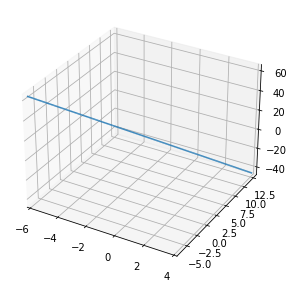

In [10]:
print("disegno una retta per due punti")
p1 = get_plot_line([-1, 3, 9], [0, 5, -2], [-5, 5])
p1.show()

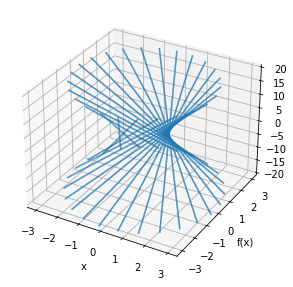

In [17]:
N = 25
phi = 0.3
h = 2

# creo le 2 N-uple di punti sulle circoferenze
c1 = circ_points(N, 0, 0)
c2 = circ_points(N, phi, h)

# creo un grafico vuoto
P1 = sympy.plotting.plot(show=False)

# riempio il grafico con le N rette
for i in range(0,N):
    P1.extend(  get_plot_line(c1[i], c2[i]) )

# mostro il grafico
P1.show()

## Animazioni 2D

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

(-11.0, 11.0)

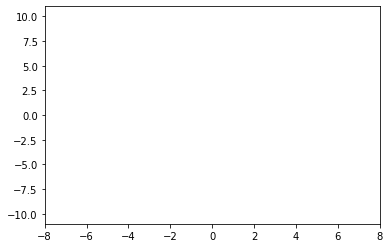

In [20]:
fig, ax = plt.subplots() # figura (contenitore di plot) e i vari plot

ax.set_xlim(-8, 8)
ax.set_ylim(-11, 11)

In [21]:
# definisco un oggetto di tipo linea (che andrò a modificare istante per istante)
line = ax.plot([],[], lw=2)[0] # dalla lista (di 1 solo elemento) perndo il primo

In [22]:
def init():
    line.set_data([], [])
    return [line]

In [26]:
# f(x) = x + 3*sin(x)
def animate(i):
    # modifico l'oggetto line in modo da contenere il grafico al tempo i-esimo
    x0 = -8
    m = i/10
    x = np.linspace(x0, x0 + m, 100) # vettore di 1000 punti
    y = x + 3*np.sin(x)
    line.set_data(x, y)
    return [line]


In [27]:
frn = 180
a1 = animation.FuncAnimation(fig, animate, init_func=init, frames=frn, interval=20, blit=True)

In [28]:
js1 = HTML( a1.to_jshtml() )

In [29]:
display(js1)